In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import zipfile
import os
import librosa
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
#Extracting Files
#with zipfile.ZipFile("Group21_Assignment4.zip","r") as zip_ref:
#    zip_ref.extractall()
#zip_ref.close()

#with zipfile.ZipFile("Group21_Assignment4/CV_Data.zip","r") as zip_ref:
#    zip_ref.extractall()
#zip_ref.close()

with zipfile.ZipFile("Handwriting_Data.zip","r") as zip_ref:
    zip_ref.extractall()
zip_ref.close()


#**`Handwritten Character Dataset`**

In [ ]:
#Reading Text Data
def load_text_data_from_folder(folder):
    Data = []
    for filename in os.listdir(folder):
        data = np.loadtxt(os.path.join(folder,filename))
        row = []
        for x,y in zip(data[1::2],data[2::2]):
          row.append([x,y])
        row = np.array(row)
        row[:,0] /= max(row[:,0])
        row[:,1] /= max(row[:,1])
        Data.append(row)
    return Data

In [ ]:
train_a   = load_text_data_from_folder("Handwriting_Data/ai/train")
train_ai  = load_text_data_from_folder("Handwriting_Data/bA/train")
train_bA  = load_text_data_from_folder("Handwriting_Data/chA/train")
train_chA = load_text_data_from_folder("Handwriting_Data/lA/train")
train_lA  = load_text_data_from_folder("Handwriting_Data/tA/train")

x_train_HW = np.concatenate([train_a,train_ai,train_bA,train_chA,train_lA])
y_train_HW = np.concatenate([0*np.ones(len(train_a)),1*np.ones(len(train_ai)),
                          2*np.ones(len(train_bA)),3*np.ones(len(train_chA)),
                          4*np.ones(len(train_lA))])
     
test_a   = load_text_data_from_folder("Handwriting_Data/ai/dev")
test_ai  = load_text_data_from_folder("Handwriting_Data/bA/dev")
test_bA  = load_text_data_from_folder("Handwriting_Data/chA/dev")
test_chA = load_text_data_from_folder("Handwriting_Data/lA/dev")
test_lA  = load_text_data_from_folder("Handwriting_Data/tA/dev")

x_test_HW = np.concatenate([test_a,test_ai,test_bA,test_chA,test_lA])
y_test_HW = np.concatenate([0*np.ones(len(test_a)),1*np.ones(len(test_ai)),
                          2*np.ones(len(test_bA)),3*np.ones(len(test_chA)),
                          4*np.ones(len(test_lA))])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


##**`Plot`**

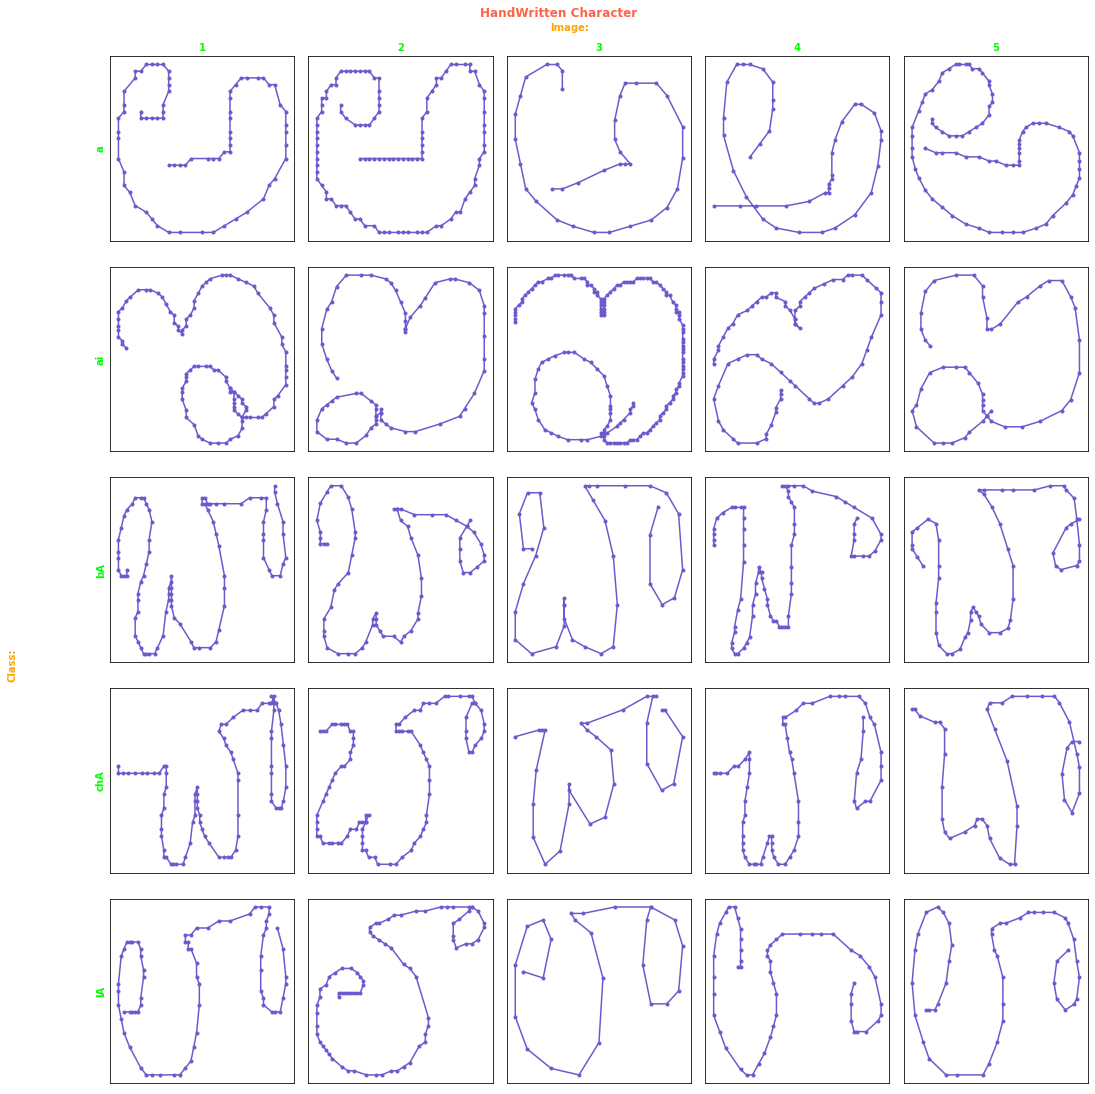

In [ ]:
def Plot(Data,nrow,ncol,index,title):
  for img in Data:
    plt.subplot(nrow,ncol,index)
    plt.plot(img[:,0],img[:,1],marker=".",color='slateblue')
    plt.xticks([]);plt.yticks([])

    if index%5==1:
      plt.ylabel(title,fontweight="bold",fontsize=10,color='lime')
      if index==11:
        plt.text(x=0.15, y=0.30, s="Class:",fontweight="bold",fontsize=10,color='orange',rotation='vertical')
    if index<=5:
      plt.title(str(index),fontweight="bold",fontsize=10,color='lime')
      if index==3:
        plt.text(x=0.685, y=1+1.25e-1, s="Image:",fontweight="bold",fontsize=10,color='orange')
    index+=1

plt.figure(figsize=(15,15))
plt.suptitle("HandWritten Character",fontweight="bold",y=1+1e-2,color='tomato')

Plot(train_a[0:5],  5,5,1,"a")
Plot(train_ai[0:5], 5,5,6,"ai")
Plot(train_bA[0:5], 5,5,11,"bA")
Plot(train_chA[0:5],5,5,16,"chA")
Plot(train_lA[0:5], 5,5,21,"lA")

plt.tight_layout()
plt.show()

#**`Consonant Vowel (CV) Segment Dataset`**

In [ ]:
#Reading MFCC Data
def load_mfcc_data_from_folder(folder):
    Data = []
    for filename in os.listdir(folder):
        data = np.loadtxt(os.path.join(folder,filename))
        Data.append(data)
    return Data

In [ ]:
train_pa   = load_mfcc_data_from_folder("CV_Data/pa/Train")
train_ba   = load_mfcc_data_from_folder("CV_Data/ba/Train")
train_hai  = load_mfcc_data_from_folder("CV_Data/hai/Train")
train_kaa  = load_mfcc_data_from_folder("CV_Data/kaa/Train")
train_sa   = load_mfcc_data_from_folder("CV_Data/sa/Train")

x_train_CV = np.concatenate([train_pa,train_ba,train_hai,train_kaa,train_sa])
y_train_CV = np.concatenate([0*np.ones(len(train_pa)),1*np.ones(len(train_ba)),
                          2*np.ones(len(train_hai)),3*np.ones(len(train_kaa)),
                          4*np.ones(len(train_sa))])
     
test_pa   = load_mfcc_data_from_folder("CV_Data/pa/Test")
test_ba   = load_mfcc_data_from_folder("CV_Data/ba/Test")
test_hai  = load_mfcc_data_from_folder("CV_Data/hai/Test")
test_kaa  = load_mfcc_data_from_folder("CV_Data/kaa/Test")
test_sa   = load_mfcc_data_from_folder("CV_Data/sa/Test")

x_test_CV = np.concatenate([test_pa,test_ba,test_hai,test_kaa,test_sa])
y_test_CV = np.concatenate([0*np.ones(len(test_pa)),1*np.ones(len(test_ba)),
                          2*np.ones(len(test_hai)),3*np.ones(len(test_kaa)),
                          4*np.ones(len(test_sa))])

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


##**`Plot`**

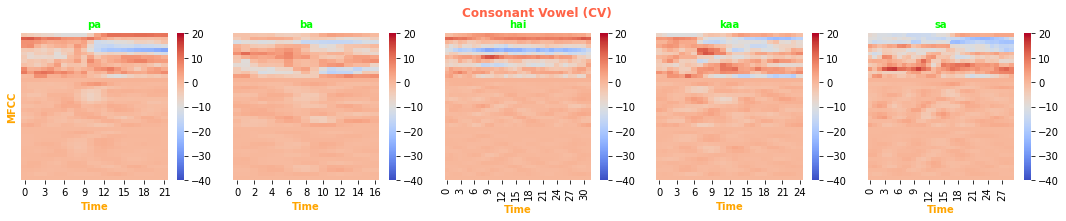

In [ ]:
def Plot(Data,nrow,ncol,index,title):
  Data = np.swapaxes(Data, 0, 1)
  plt.subplot(nrow,ncol,index)
  sns.heatmap(Data, cmap=cm.coolwarm,vmin=-40,vmax=20)
  plt.yticks([])
  if index==1:
    plt.ylabel("MFCC",fontweight="bold",fontsize=10,color='orange')
  plt.xlabel("Time",fontweight="bold",fontsize=10,color='orange')
  plt.title(title,fontweight="bold",fontsize=10,color='lime')

plt.figure(figsize=(15,3))
plt.suptitle("Consonant Vowel (CV)",fontweight="bold",y=1+1e-2,color='tomato')

Plot(train_pa[0],1,5,1,"pa")
Plot(train_ba[0],1,5,2,"ba")
Plot(train_hai[0],1,5,3,"hai")
Plot(train_kaa[0],1,5,4,"kaa")
Plot(train_sa[0],1,5,5,"sa")

plt.tight_layout()
plt.show()

#**`Common Code`**

In [ ]:
#Converting one hot encoded test label to label
def ohetolabel(array): 
  output = list()
  for i in range(len(array)):
    output.append(np.argmax(array[i]))
  return np.array(output)
  
#Plot cf matrix
def cf_matrix_plot(cf_matrix,title,title2):
  #group_names = ['True Neg','False Pos','False Neg','True Pos','True Pos','True Pos','True Pos','True Pos','True Pos']

  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  labels = [f"{v1}\n{v2}\n" for v1, v2 in
            zip(group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(5,5)

  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title(title,fontweight="bold",color='orange');
  ax.set_xlabel('\nPredicted Class',fontweight="bold",fontsize=10,color='lime')
  ax.set_ylabel('Actual Class',fontweight="bold",fontsize=10,color='lime');

  ## Ticket labels - List must be in alphabetical order
  if title2[-1]=='r':
    ax.xaxis.set_ticklabels(['a','ai','bA','chA','lA'])
    ax.yaxis.set_ticklabels(['a','ai','bA','chA','lA'])
  else:
    ax.xaxis.set_ticklabels(['pa','ba','hai','kaa','sa'])
    ax.yaxis.set_ticklabels(['pa','ba','hai','kaa','sa'])

def Display(history,y_train,y_train_pred,y_test,y_test_pred,title):
  print("No of Epochs =",len(history.history["loss"]))
  plt.figure(figsize=(8,4))
  plt.suptitle(title,fontweight="bold",y=1+1e-2,color='tomato')
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'],marker='.')
  plt.title('Model accuracy',fontweight="bold",fontsize=10,color='orange')
  plt.ylabel('Accuracy',fontweight="bold",fontsize=10,color='lime')
  plt.xlabel('Epoch',fontweight="bold",fontsize=10,color='lime')
  plt.legend(['Train'], loc='upper left')
  plt.grid()
  
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'],marker='.')
  plt.title('Model loss',fontweight="bold",fontsize=10,color='orange') 
  plt.ylabel('Loss',fontweight="bold",fontsize=10,color='lime') 
  plt.xlabel('Epoch',fontweight="bold",fontsize=10,color='lime') 
  plt.legend(['Train'], loc='upper left')
  plt.grid()
  plt.tight_layout();plt.show()

  print("Training Accuracy =\t",history.history['accuracy'][-1])
  print("Test Accuracy =\t",history.history['val_accuracy'][-1])

  #Generate the confusion matrix
  plt.figure(figsize=(8,4))
  plt.suptitle(title,fontweight="bold",y=1+1e-2,color='tomato')
  plt.subplot(1,2,1)
  cf_matrix = confusion_matrix(y_train, y_train_pred)
  cf_matrix_plot(cf_matrix,"Training Data",title)
  
  plt.subplot(1,2,2)
  cf_matrix = confusion_matrix(y_test, y_test_pred)
  cf_matrix_plot(cf_matrix,"Test Data",title)  
  plt.tight_layout()
  plt.show()

  print("\tTraining Data\t\t\t\tTest Data")
  print("Accuracy:",end=" ")
  print(np.around(accuracy_score(y_train , y_train_pred),4),end="\t"*4)
  print(np.around(accuracy_score(y_test , y_test_pred),4))

  print("Precision:",end="")
  print(np.around(precision_score(y_train , y_train_pred,average="macro"),4),end="\t"*4)
  print(np.around(precision_score(y_test , y_test_pred,average="macro"),4))

  print("Recall:",end="   ")
  print(np.around(recall_score(y_train , y_train_pred,average="macro"),4),end="\t"*4)
  print(np.around(recall_score(y_test , y_test_pred,average="macro"),4))

  print("F1-Score:",end=" ")
  print(np.around(f1_score(y_train , y_train_pred,average="macro"),4),end="\t"*4)
  print(np.around(f1_score(y_test , y_test_pred,average="macro"),4))

#**`RNN`**

In [ ]:
def rnn(x_train,x_test,y_train,y_test,h1,h2,input_shape,title):
   
  model = Sequential()
  model.add(SimpleRNN(h1, input_shape=input_shape,activation='tanh',return_sequences=True))
  model.add(SimpleRNN(h2,activation='tanh'))
  model.add(Dense(5,activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.summary()

  ohe = OneHotEncoder()
  y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
  y_test  = ohe.fit_transform(y_test.reshape(-1,1)).toarray()
  

  def train_generator():
    i = 0
    while True:
      x = x_train[i].reshape(1,-1,2)
      y = y_train[i].reshape(1,5,1)
      yield x,y
      i+=1
      i%=len(x_train)


  def val_generator():
    i = 0
    while True:
        x = x_test[i].reshape(1,-1,input_shape[-1])
        y = y_test[i].reshape(1,5,1)
        yield x, y
        i+=1
        i%=len(x_test)
        
  error_th = 1e-4
  keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
  es = EarlyStopping(monitor='loss',mode='min',min_delta = error_th,verbose=0,patience=5)
  history = model.fit(train_generator(),steps_per_epoch=len(x_train),epochs=10,verbose=2,callbacks=[es],
                       validation_data = val_generator(),validation_steps=len(x_test))
  print("Training Accuracy =\t",history.history['accuracy'][-1])
  # this is for prediction purpose
  y_train_pred = []
  y_test_pred  = []
  for i in range(len(x_train)):
    y_train_pred.append(model.predict(x_train[i].reshape(1,-1,input_shape[-1])))
  for i in range(len(x_test)):
    y_test_pred.append(model.predict(x_test[i].reshape(1,-1,input_shape[-1])))
  y_train_pred = np.array(y_train_pred)
  y_test_pred  = np.array(y_test_pred)
  #Converting one hot encoded test label to label
  def ohetolabel(array): 
    output = list()
    for i in range(len(array)):
      output.append(np.argmax(array[i]))
    return np.array(output)
  y_train      = ohetolabel(y_train)
  y_test       = ohetolabel(y_test)
  y_train_pred = ohetolabel(y_train_pred)
  y_test_pred  = ohetolabel(y_test_pred)
 
  print("test accuracy :")
 
  print(np.around(accuracy_score(y_test , y_test_pred),4))
  print(confusion_matrix(y_test , y_test_pred))
  Display(history,y_train,y_train_pred,y_test,y_test_pred,title)

##**`Handwritten Character`**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 8)           88        
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
344/344 - 9s - loss: 1.4117 - accuracy: 0.4477 - val_loss: 2.4881 - val_accuracy: 0.2000 - 9s/epoch - 27ms/step
Epoch 2/10
344/344 - 7s - loss: 1.2982 - accuracy: 0.4797 - val_loss: 1.7747 - val_accuracy: 0.2100 - 7s/epoch - 21ms/step
Epoch 3/10
344/344 - 8s - loss: 1.2212 - accuracy: 0.5203 - val_loss: 1.97

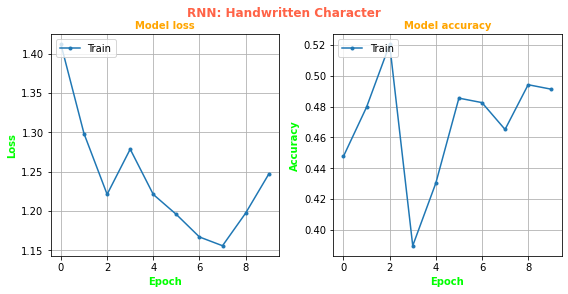

Training Accuracy =	 0.49127906560897827
Test Accuracy =	 0.20999999344348907


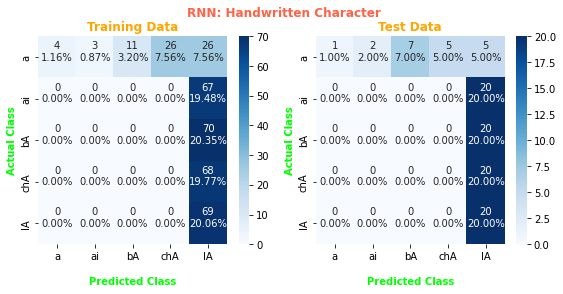

	Training Data				Test Data
Accuracy: 0.2122				0.21
Precision:0.246				0.2471
Recall:   0.2114				0.21
F1-Score: 0.0964				0.0952


In [ ]:
h1 = 8
h2 = 8
input_shape = (None,2)
title='RNN: Handwritten Character'
rnn(x_train_HW,x_test_HW,y_train_HW,y_test_HW,h1,h2,input_shape,title)

##**`Constant Vowel(CV) Segment`**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 16)          896       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense (Dense)               (None, 5)                 45        
                                                                 
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1857/1857 - 19s - loss: 0.6277 - accuracy: 0.8040 - val_loss: 4.2610 - val_accuracy: 0.1853 - 19s/epoch - 10ms/step
Epoch 2/1000
1857/1857 - 16s - loss: 1.3446 - accuracy: 0.4610 - val_loss: 1.1851 - val_accuracy: 0.5043 - 16s/epoch - 9ms/step
Epoch 3/1000
1857/1857 - 16s - loss: 1.1179 - accuracy: 0.539

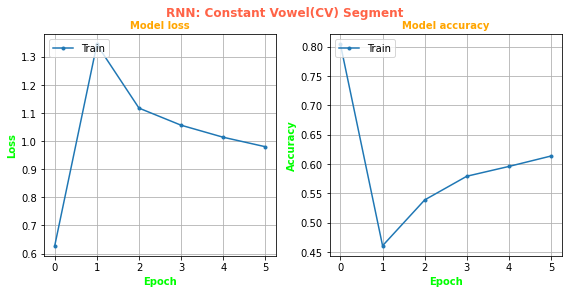

Training Accuracy =	 0.6138933897018433
Test Accuracy =	 0.5517241358757019


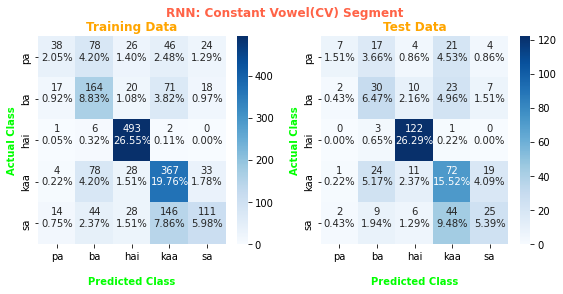

	Training Data				Test Data
Accuracy: 0.6317				0.5517
Precision:0.5926				0.5288
Recall:   0.554				0.4749
F1-Score: 0.5448				0.4663


In [ ]:
h1 = 16
h2 = 8
input_shape = (None,39)
title='RNN: Constant Vowel(CV) Segment'
rnn(x_train_CV,x_test_CV,y_train_CV,y_test_CV,h1,h2,input_shape,title)

#**`LSTM`**

In [ ]:
def lstm(x_train,x_test,y_train,y_test,h1,h2,input_shape,title):
   
  model = Sequential()
  model.add(LSTM(h1, input_shape=input_shape,activation='tanh',return_sequences=True))
  model.add(LSTM(h2, activation='tanh'))
  model.add(Dense(5,activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
  model.summary()

  ohe = OneHotEncoder()
  y_train = ohe.fit_transform(y_train.reshape(-1,1)).toarray()
  y_test  = ohe.fit_transform(y_test.reshape(-1,1)).toarray()
  
  index = list(range(len(x_train)))
  def train_generator():
    ind=0
    while True:
        i = index[ind]
        x = x_train[i].reshape(1,-1,input_shape[-1])
        y = y_train[i].reshape(1,5,1)
        yield x, y
        ind+=1
        if ind==len(x_train):
          np.random.shuffle(index)
        ind%=len(x_train)
  
  def val_generator():
    i = 0
    while True:
        x = x_test[i].reshape(1,-1,input_shape[-1])
        y = y_test[i].reshape(1,5,1)
        yield x, y
        i+=1
        i%=len(x_test)
        
  error_th = 1e-4
  keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
  es = EarlyStopping(monitor='loss',min_delta = error_th,verbose=0,patience=5)
  history = model.fit(train_generator(),steps_per_epoch=len(x_train),epochs=1000,verbose=2,callbacks=[es],
                       validation_data = val_generator(),validation_steps=len(x_test))
  
  # this is for prediction purpose
  y_train_pred = []
  y_test_pred  = []
  for i in range(len(x_train)):
    y_train_pred.append(model.predict(x_train[i].reshape(1,-1,input_shape[-1])))
  for i in range(len(x_test)):
    y_test_pred.append(model.predict(x_test[i].reshape(1,-1,input_shape[-1])))
  y_train_pred = np.array(y_train_pred)
  y_test_pred  = np.array(y_test_pred)

  y_train      = ohetolabel(y_train)
  y_test       = ohetolabel(y_test)
  y_train_pred = ohetolabel(y_train_pred)
  y_test_pred  = ohetolabel(y_test_pred)

  Display(history,y_train,y_train_pred,y_test,y_test_pred,title)

##**`Handwritten Character`**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 4)           112       
                                                                 
 lstm_1 (LSTM)               (None, 4)                 144       
                                                                 
 dense_1 (Dense)             (None, 5)                 25        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
344/344 - 18s - loss: 1.5435 - accuracy: 0.3634 - val_loss: 1.7835 - val_accuracy: 0.2000 - 18s/epoch - 53ms/step
Epoch 2/1000
344/344 - 13s - loss: 1.6025 - accuracy: 0.2907 - val_loss: 1.5087 - val_accuracy: 0.3700 - 13s/epoch - 38ms/step
Epoch 3/1000
344/344 - 13s - loss: 1.4587 - accuracy: 0.3576 - val

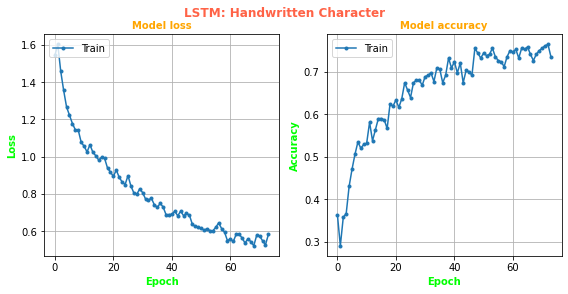

Training Accuracy =	 0.7354651093482971
Test Accuracy =	 0.8399999737739563


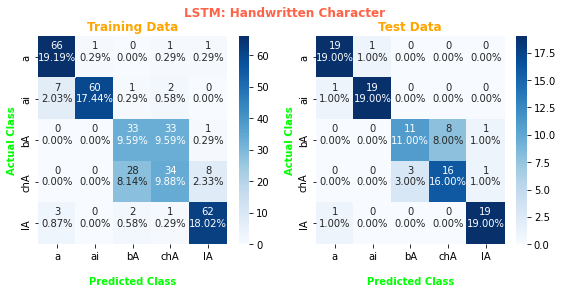

	Training Data				Test Data
Accuracy: 0.7413				0.84
Precision:0.7415				0.8424
Recall:   0.7407				0.84
F1-Score: 0.7396				0.8356


In [ ]:
h1 = 4
h2 = 4
input_shape = (None,2)
title='LSTM: Handwritten Character'
lstm(x_train_HW,x_test_HW,y_train_HW,y_test_HW,h1,h2,input_shape,title)

##**`Constant Vowel(CV) Segment`**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, None, 8)           1536      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 5)                 45        
                                                                 
Total params: 2,125
Trainable params: 2,125
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1857/1857 - 43s - loss: 0.6649 - accuracy: 0.8368 - val_loss: 3.2797 - val_accuracy: 0.1940 - 43s/epoch - 23ms/step
Epoch 2/1000
1857/1857 - 38s - loss: 1.1342 - accuracy: 0.5724 - val_loss: 0.9325 - val_accuracy: 0.6595 - 38s/epoch - 21ms/step
Epoch 3/1000
1857/1857 - 37s - loss: 0.7807 - accuracy: 0.

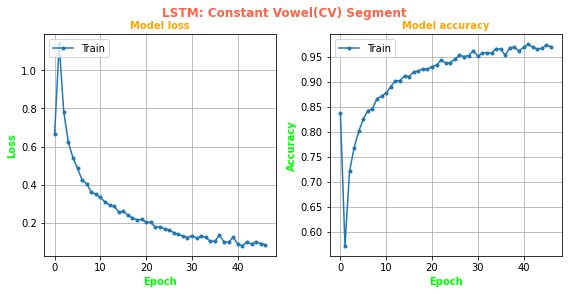

Training Accuracy =	 0.9698438048362732
Test Accuracy =	 0.8275862336158752


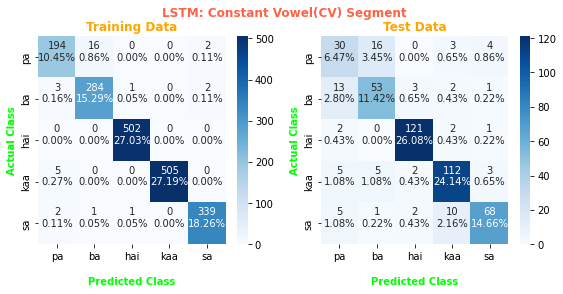

	Training Data				Test Data
Accuracy: 0.9822				0.8276
Precision:0.9758				0.7898
Recall:   0.9746				0.787
F1-Score: 0.975				0.7878


In [ ]:
h1 = 8
h2 = 8
input_shape = (None,39)
title='LSTM: Constant Vowel(CV) Segment'
lstm(x_train_CV,x_test_CV,y_train_CV,y_test_CV,h1,h2,input_shape,title)